# Data Wrangling

### Student Name: Nicholas Marshall

Notes:

LPEP = Livery Passenger Enhancements Program


In [1]:
#import any required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


#### Step 1 – Programmatically download the required data for December 2019.

In [2]:
url = 'https://nyc-tlc.s3.amazonaws.com/trip+data/green_tripdata_2019-12.csv' #provide the link to the data for December 2019
#note from student: Presumably this should be data for the Green Trips only,
#given that the data dictionary provided is specific to "Green Trip Taxi Records"
try:
    data = pd.read_csv(url) #load the data into a dataframe
    
except IOError:
    print ('Unable to read the input file.')
    exit()

C:\Users\Nick\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Step 2 – Report the number of rows and columns in the data.

In [3]:
#Print the number of rows and columns in data.
data.shape



(450627, 20)

#### Step 3 – Gather summary/descriptive statistics. State your initial observations (no more than 1 paragraph) and identify any inconsistencies. 
HINT: you can use the **describe** function

In [4]:
#display the summary statistics using the describe() function from the pandas dataframe
#state your observations or any inconsistencies that were detected in step 3
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,359902.000000,359902.000000,450627.000000,450627.000000,359902.000000,450627.000000,450627.000000,450627.000000,450627.000000,450627.000000,450627.000000,0.0,450625.000000,450627.000000,359902.000000,359900.000000,359900.000000
mean,1.833449,1.102836,107.480599,128.446118,1.311582,3.445025,15.586714,0.888232,0.439677,0.949459,0.289563,NaN,0.270599,18.736671,1.477002,1.023226,0.426469
std,0.372575,0.623131,70.625075,76.086904,0.968107,117.057614,12.915723,1.166764,0.166541,2.182414,1.369154,NaN,0.091492,14.405428,0.521520,0.150620,0.995450
min,1.000000,1.000000,1.000000,1.000000,0.000000,-9436.330000,-200.000000,-4.500000,-0.500000,-90.500000,0.000000,NaN,-0.300000,-200.000000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,52.000000,64.000000,1.000000,1.040000,7.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,8.800000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.940000,11.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,14.150000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,192.000000,1.000000,4.000000,20.500000,1.000000,0.500000,1.560000,0.000000,NaN,0.300000,24.420000,2.000000,1.000000,0.000000
max,2.000000,6.000000,265.000000,265.000000,9.000000,77843.760000,500.000000,8.250000,3.550000,441.000000,48.000000,NaN,0.300000,500.300000,5.000000,2.000000,2.750000


In [5]:
data[(data['trip_distance'] < 0) & (data['payment_type'] == 6)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


##### There are four ID columns presenting categorical data: VendorID, RatecodeID, PULocationID, DOLocationID. In addition there are two categorical columns that use numbers to represent categories: payment_type and trip_type. Passenger_count ranges from no passengers (Odd. When would a taxi charge fares when there are no passengers?) to nine passengers. It's fairly apparent from the quartiles that most of the time, taxis carried one passenger. Trip_distance is interesting as well. The describe() method shows a minimum value of -9436.33. Is this an input error or a code for non applicable? Maximum distance is also quite extreme (77,843 miles). Fare_amount has a confusing minimum of -200. Why would there be a negative fare? Other columns also have negative values. There seems to be some discrepancy with the row counts. Some rows, PULocationID for example, have a row count of 450627, but others, including VendorID, have a row count of 359,902. 

#### Step 4 – Examine the data for missing observations and duplicate records. Suggest what methods are appropriate to handle them.

In [6]:
data.head(20)
data.isnull().sum() #provides a count of each column and the number of missing values


VendorID                  90725
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        90725
RatecodeID                90725
PULocationID                  0
DOLocationID                  0
passenger_count           90725
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                450627
improvement_surcharge         2
total_amount                  0
payment_type              90725
trip_type                 90727
congestion_surcharge      90727
dtype: int64

Observations: 
There is a steady number (90,725) of missing values under the categories of VendorID, store_and_fwd_flag, RatecodeID, passenger_count, and payment type. There are a similar number of missing values (90,727) for trip_type and congestion_surcharge. Finally, there are an enormous number of missing values for ehail_fee (450,626). 

Question: What's common about the trips with missing ehail_fees?


In [7]:
data[data['ehail_fee'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.00,0.50,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,0.0
1,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,0.50,0.5,2.04,0.0,NaN,0.3,8.84,1.0,1.0,0.0
2,2.0,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,0.50,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
3,2.0,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,0.50,0.5,0.00,0.0,NaN,0.3,15.30,2.0,1.0,0.0
4,2.0,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,0.50,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450622,NaN,2019-12-31 23:26:00,2019-12-31 23:54:00,NaN,NaN,35,130,NaN,10.02,48.85,2.75,0.0,0.00,0.0,NaN,0.3,51.90,NaN,NaN,NaN
450623,NaN,2019-12-31 23:02:00,2019-12-31 23:16:00,NaN,NaN,76,61,NaN,2.27,23.31,2.75,0.0,0.00,0.0,NaN,0.3,26.36,NaN,NaN,NaN
450624,NaN,2019-12-31 23:24:00,2019-12-31 23:40:00,NaN,NaN,185,247,NaN,9.35,27.27,2.75,0.0,0.00,0.0,NaN,0.3,30.32,NaN,NaN,NaN
450625,NaN,2019-12-31 23:16:00,2019-12-31 23:37:00,NaN,NaN,51,126,NaN,-7.16,35.95,2.75,0.5,0.00,0.0,NaN,0.3,39.50,NaN,NaN,NaN


Wait a minute. It looks like there are NO rows with ehail_fee values. I rechecked the data dictionary; ehails_fee isn't in the dictionary. Maybe this value is completely irrelevant?

Any common features in trips where the trip_type is null?

In [8]:
data[data['trip_type'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
356911,1.0,2019-12-31 20:47:14,2019-12-31 20:47:14,Y,1.0,210,264,1.0,0.00,3.50,0.50,0.5,0.0,0.0,NaN,NaN,4.50,2.0,NaN,NaN
357903,1.0,2019-12-31 21:29:23,2019-12-31 21:55:11,Y,1.0,89,107,1.0,10.40,32.00,0.50,0.5,0.0,0.0,NaN,NaN,33.00,2.0,NaN,NaN
359902,NaN,2019-12-01 00:51:00,2019-12-01 01:14:00,NaN,NaN,70,138,NaN,6.82,25.75,2.75,0.5,0.0,0.0,NaN,0.0,29.00,NaN,NaN,NaN
359903,NaN,2019-12-01 00:16:00,2019-12-01 00:38:00,NaN,NaN,74,32,NaN,7.88,35.59,2.75,0.5,0.0,0.0,NaN,0.0,38.84,NaN,NaN,NaN
359904,NaN,2019-12-01 00:20:00,2019-12-01 00:43:00,NaN,NaN,235,143,NaN,8.79,39.75,2.75,0.5,0.0,0.0,NaN,0.0,43.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450622,NaN,2019-12-31 23:26:00,2019-12-31 23:54:00,NaN,NaN,35,130,NaN,10.02,48.85,2.75,0.0,0.0,0.0,NaN,0.3,51.90,NaN,NaN,NaN
450623,NaN,2019-12-31 23:02:00,2019-12-31 23:16:00,NaN,NaN,76,61,NaN,2.27,23.31,2.75,0.0,0.0,0.0,NaN,0.3,26.36,NaN,NaN,NaN
450624,NaN,2019-12-31 23:24:00,2019-12-31 23:40:00,NaN,NaN,185,247,NaN,9.35,27.27,2.75,0.0,0.0,0.0,NaN,0.3,30.32,NaN,NaN,NaN
450625,NaN,2019-12-31 23:16:00,2019-12-31 23:37:00,NaN,NaN,51,126,NaN,-7.16,35.95,2.75,0.5,0.0,0.0,NaN,0.3,39.50,NaN,NaN,NaN


any insight to be had from the negative values?

In [9]:
data_neg = data[data['trip_distance'] < 0]
data_neg['VendorID'].value_counts()

2.0    33
Name: VendorID, dtype: int64

Observation: There are over 3,100 rows with negative trip distances. That seems a lot more than a simple accident. There must be some significance...May need to consult a subject matter expert. Negative trips that have a vendor ID have VeriFone systems. 

Point of curiosity: how many disputed transactions were there?

In [10]:
data[data['payment_type'] == 4]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
410,2.0,2019-12-01 00:36:26,2019-12-01 00:42:22,N,1.0,112,112,5.0,0.58,-4.0,-0.50,-0.5,0.0,0.0,NaN,-0.3,-5.30,4.0,1.0,0.00
814,1.0,2019-12-01 02:34:52,2019-12-01 02:44:15,N,1.0,120,116,1.0,1.70,8.5,0.50,0.5,0.0,0.0,NaN,0.3,9.80,4.0,1.0,0.00
815,1.0,2019-12-01 02:52:48,2019-12-01 03:03:49,N,5.0,244,240,1.0,5.90,0.0,0.00,0.0,0.0,0.0,NaN,0.0,0.00,4.0,2.0,0.00
1304,2.0,2019-12-01 03:17:04,2019-12-01 03:18:32,N,5.0,247,247,1.0,0.00,-7.0,0.00,0.0,0.0,0.0,NaN,0.0,-7.00,4.0,2.0,0.00
2205,2.0,2019-12-01 09:51:43,2019-12-01 09:52:40,N,1.0,41,41,2.0,0.03,-2.5,0.00,-0.5,0.0,0.0,NaN,-0.3,-3.30,4.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357814,2.0,2019-12-31 21:50:06,2019-12-31 21:53:17,N,1.0,7,7,2.0,0.57,-4.5,-0.50,-0.5,0.0,0.0,NaN,-0.3,-5.80,4.0,1.0,0.00
358328,1.0,2019-12-31 21:19:23,2019-12-31 21:27:26,N,1.0,166,239,3.0,1.80,8.0,3.25,0.5,0.0,0.0,NaN,0.3,12.05,4.0,1.0,2.75
358349,2.0,2019-12-31 21:17:25,2019-12-31 21:18:13,N,1.0,74,74,1.0,0.03,-2.5,-0.50,-0.5,0.0,0.0,NaN,-0.3,-3.80,4.0,1.0,0.00
358992,1.0,2019-12-31 22:58:19,2019-12-31 23:12:31,N,1.0,97,225,1.0,2.60,11.5,0.50,0.5,0.0,0.0,NaN,0.3,12.80,4.0,1.0,0.00


Looks like 723. 

Suggestions:
Remove ehails_fee column outright.
Talk to subject matter expert about negative trip_distances and negative fares.
Doesn't make sense in my opinion to eliminate all rows that contain a NaN. If we flat footedly do that, we would, for example, lose a number of pickup and dropoff times that seem legitimate. 

In [11]:
data.duplicated().sum()
duplicate_data = data[data.duplicated()] #filters the data to show duplicated lines
duplicate_data #Strange. No amount of time or distance spent, but passenger paid 10 dollars. Trip_type indicates this was a street hail.
                #I think at this point it's reasonable to treat this as a double entry error and simply remove row 311267. 

data.iloc[311265:311269] #checking to see surrounding data. Maybe there's something informative in how the data is arranged?

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
311265,2.0,2019-12-27 11:46:13,2019-12-27 12:10:03,N,1.0,75,244,1.0,5.4,21.0,0.0,0.5,4.36,0.0,NaN,0.3,26.16,1.0,1.0,0.0
311266,2.0,2019-12-27 12:05:00,2019-12-27 12:05:00,N,5.0,264,264,1.0,0.0,10.0,0.0,0.0,0.00,0.0,NaN,0.0,10.00,1.0,1.0,0.0
311267,2.0,2019-12-27 12:05:00,2019-12-27 12:05:00,N,5.0,264,264,1.0,0.0,10.0,0.0,0.0,0.00,0.0,NaN,0.0,10.00,1.0,1.0,0.0
311268,1.0,2019-12-27 12:20:13,2019-12-27 12:21:10,N,1.0,145,145,1.0,0.0,2.5,0.0,0.5,0.00,0.0,NaN,0.3,3.30,2.0,1.0,0.0


In [12]:
#Perform the action(s) in step 4 to handle any missing data and duplicate records that were found.
data = data.drop_duplicates(keep = 'first') #remove duplicate


#### Step 5 – Plot a histogram showing the distribution of the trip distance. Discuss your observations (no more than 1 paragraph).

(array([2.00000e+00, 4.50623e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-9436.33 ,  -708.321,  8019.688, 16747.697, 25475.706, 34203.715,
        42931.724, 51659.733, 60387.742, 69115.751, 77843.76 ]),
 <BarContainer object of 10 artists>)

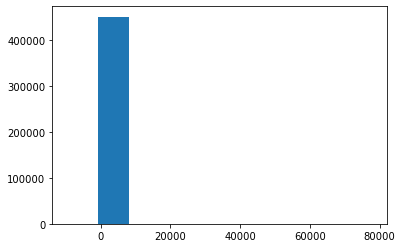

In [13]:
import matplotlib.pyplot as plt
plt.hist(data['trip_distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc8015b400>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc8015bac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc8015b0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc801691c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc80169520>],
 'means': []}

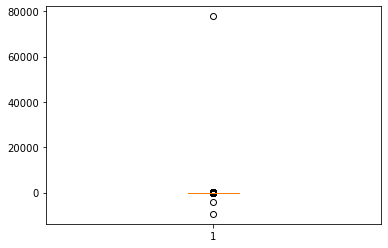

In [14]:
plt.boxplot(data['trip_distance']) # Histograms are not the best way to search for outliers. Let's try a boxplot.


In [15]:
data.nlargest(5, 'trip_distance') # This has to be an error. The largest trip_distance is huge, but the fare_amount is comparatively smaller. 
#I say we eliminate this record



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
374207,NaN,2019-12-05 14:18:00,2019-12-05 15:06:00,NaN,NaN,233,220,NaN,77843.76,42.7,2.75,0.5,0.0,2.8,NaN,0.3,49.05,NaN,NaN,NaN
257190,1.0,2019-12-21 17:42:51,2019-12-21 17:42:56,N,1.0,82,82,1.0,333.30,2.5,0.00,0.5,0.0,0.0,NaN,0.3,3.30,2.0,1.0,0.00
254158,2.0,2019-12-21 13:52:03,2019-12-21 16:37:07,N,1.0,210,265,1.0,101.20,265.5,0.00,0.5,0.0,0.0,NaN,0.3,269.05,2.0,1.0,2.75
302978,2.0,2019-12-26 14:59:38,2019-12-26 19:36:20,N,1.0,223,223,1.0,87.14,294.5,0.00,0.5,0.0,0.0,NaN,0.3,295.30,2.0,1.0,0.00
44000,1.0,2019-12-04 22:07:00,2019-12-05 00:06:48,N,5.0,244,265,1.0,74.60,100.0,0.00,0.0,0.0,10.5,NaN,0.0,110.50,4.0,2.0,0.00


In [16]:
data = data[data['trip_distance'] < 400]

data.shape

(450625, 20)

Now, what if we consider the most negative trip distances from least to greatest? Is there some discernible pattern explaining this anomaly?

In [17]:
data.nsmallest(15, 'trip_distance')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
438309,NaN,2019-12-26 12:33:00,2019-12-26 12:38:00,NaN,NaN,223,223,NaN,-9436.33,16.83,2.75,0.0,0.0,0.00,NaN,0.3,19.88,NaN,NaN,NaN
376919,NaN,2019-12-06 10:54:00,2019-12-06 11:47:00,NaN,NaN,117,117,NaN,-4311.35,21.54,2.75,0.0,0.0,0.00,NaN,0.0,24.29,NaN,NaN,NaN
401871,NaN,2019-12-13 13:07:00,2019-12-13 14:08:00,NaN,NaN,262,201,NaN,-30.74,55.13,2.75,0.5,0.0,8.41,NaN,0.3,67.09,NaN,NaN,NaN
401004,NaN,2019-12-13 10:33:00,2019-12-13 12:19:00,NaN,NaN,117,48,NaN,-30.20,48.97,5.50,0.5,0.0,8.41,NaN,0.3,63.68,NaN,NaN,NaN
438213,NaN,2019-12-26 11:47:00,2019-12-26 12:55:00,NaN,NaN,117,18,NaN,-29.98,68.90,2.75,0.5,0.0,8.41,NaN,0.3,80.86,NaN,NaN,NaN
377774,NaN,2019-12-06 13:10:00,2019-12-06 14:19:00,NaN,NaN,174,89,NaN,-29.96,59.10,2.75,0.5,0.0,6.12,NaN,0.3,68.77,NaN,NaN,NaN
375373,NaN,2019-12-05 20:11:00,2019-12-05 21:20:00,NaN,NaN,14,191,NaN,-29.55,44.86,2.75,0.5,0.0,0.00,NaN,0.3,48.41,NaN,NaN,NaN
385412,NaN,2019-12-09 09:14:00,2019-12-09 10:37:00,NaN,NaN,51,231,NaN,-29.34,61.20,2.75,0.5,0.0,2.80,NaN,0.3,67.55,NaN,NaN,NaN
400560,NaN,2019-12-13 09:04:00,2019-12-13 10:19:00,NaN,NaN,201,107,NaN,-29.29,49.98,2.75,0.5,0.0,8.41,NaN,0.3,61.94,NaN,NaN,NaN
376025,NaN,2019-12-06 06:27:00,2019-12-06 07:46:00,NaN,NaN,117,4,NaN,-29.21,56.10,2.75,0.5,0.0,2.29,NaN,0.3,61.94,NaN,NaN,NaN


Observations: I don't see a clear explanation, but I think it's a safe bet to eliminate the two outliers that have trip_distances less than -4000.

In [18]:
data = data[data['trip_distance'] > -4000]

We started with 450627, we now have 450623. We've cut 4 rows. One was a duplicate, two were negative outliers. One was a postive outlier.

Updated Histogram and Boxplot

(array([0.00000e+00, 2.00000e+00, 1.89000e+02, 1.05200e+03, 1.86200e+03,
        4.16987e+05, 2.65120e+04, 3.70400e+03, 2.64000e+02, 3.00000e+01]),
 array([-50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <BarContainer object of 10 artists>)

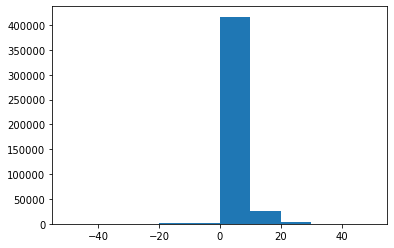

In [19]:
plt.hist(data['trip_distance'], range = (-50,50)) 

Paragraph description: Histogram is unimodal and right skewed. Looks like a vast majority of trips were between 0 and about 2.5 miles. The negative values now look insignificant and are probably just noise. I think it's safe to eliminate them altogether.

In [20]:
data = data[data['trip_distance'] >= 0]

In [21]:
data.shape

(447518, 20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc8023d970>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc8024b070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc8023d610>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc8024b730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc8024ba90>],
 'means': []}

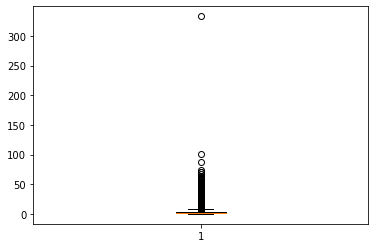

In [22]:
plt.boxplot(data['trip_distance'])

Still getting outliers. Eliminate all values greater than 100.

In [23]:
data = data[data['trip_distance'] <= 100]

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc80294d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc802a3490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc80294a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc802a3b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc802a3eb0>],
 'means': []}

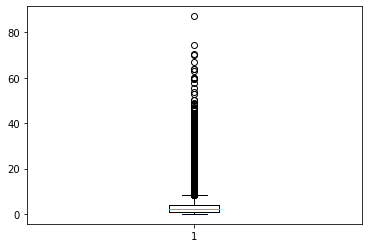

In [24]:
plt.boxplot(data['trip_distance'])

#### Step 6 – Did you detect any outliers in step 5? If so, perform a suitable method to handle them?

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc802f3d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc80300490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc802f3a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc80300b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc80300eb0>],
 'means': []}

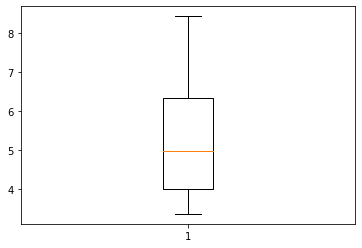

In [25]:
#Let's use IQR to remove all outliers of trip_distance

q_75 = data['trip_distance'].quantile(q=0.75)
q_25 = data['trip_distance'].quantile(q=0.25)
iqr = q_75 - q_25
iqr

oneptfive_iqr = 1.5* iqr
upper = oneptfive_iqr + q_75
lower = oneptfive_iqr - q_25

data_no_outliers = data[(data['trip_distance'] < upper) & (data['trip_distance'] > lower)] #filtering all outliers out.

plt.boxplot(data_no_outliers['trip_distance'])

(array([19533., 14716., 11757., 10028.,  8678.,  8194.,  7061.,  6239.,
         5266.,  4198.]),
 array([3.37 , 3.876, 4.382, 4.888, 5.394, 5.9  , 6.406, 6.912, 7.418,
        7.924, 8.43 ]),
 <BarContainer object of 10 artists>)

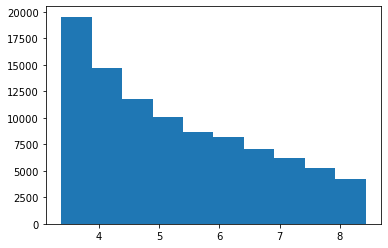

In [26]:
#one last look at the histogram now:

plt.hist(data_no_outliers['trip_distance'])

#### Step 7 – Show the frequency of trips for each date. Do you see any interesting patterns or do you detect the need for additional data prep. rules.

In [27]:
#Transform datetime, so that only date is present. For ease use pickup datetime

data_no_outliers['date'] = data_no_outliers['lpep_pickup_datetime'].apply(lambda x: x.split(" ")[0])

<ipython-input-27-96c78aea2470>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['date'] = data_no_outliers['lpep_pickup_datetime'].apply(lambda x: x.split(" ")[0])


In [28]:
data_no_outliers.groupby('date').count()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
date,,,,,,,,,,,,,,,,,,,,
2010-09-23,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
2019-11-30,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2
2019-12-01,1729,2185,2185,1729,1729,2185,2185,1729,2185,2185,2185,2185,2185,2185,0,2185,2185,1729,1729,1729
2019-12-02,1780,2868,2868,1780,1780,2868,2868,1780,2868,2868,2868,2868,2868,2868,0,2868,2868,1780,1780,1780
2019-12-03,2085,3423,3423,2085,2085,3423,3423,2085,3423,3423,3423,3423,3423,3423,0,3423,3423,2085,2085,2085
2019-12-04,2103,3562,3562,2103,2103,3562,3562,2103,3562,3562,3562,3562,3562,3562,0,3562,3562,2103,2103,2103
2019-12-05,2261,3844,3844,2261,2261,3844,3844,2261,3844,3844,3844,3844,3844,3844,0,3844,3844,2261,2261,2261
2019-12-06,2464,3860,3860,2464,2464,3860,3860,2464,3860,3860,3860,3860,3860,3860,0,3860,3860,2464,2464,2464
2019-12-07,2638,3428,3428,2638,2638,3428,3428,2638,3428,3428,3428,3428,3428,3428,0,3428,3428,2638,2638,2638


Based on the label for this data set, we are supposed to be looking only at data for Dec 2019, and yet there's one trip from 2010, and five trips from 2020. It's interesting to see that Dec. 25th is easily the least busy day of December, but it's also interesting to see there were still about two thousand pickups. 

#### Step 8 
  - (a) Create a visualization that shows how people pay for their cab rides (e.g. credit card, cash, etc.). Can you say what is the most popular mode of payment?
  - (b) Filter the data to only include customers who paid via credit card.

<AxesSubplot:>

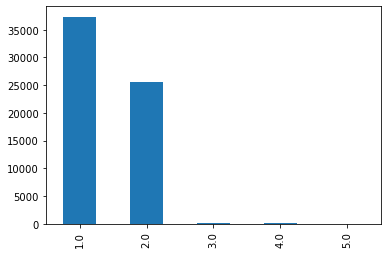

In [29]:
#Graph showing most popular form of payment.
data_no_outliers['payment_type'].value_counts().plot(kind='bar')

The most popular form of payment is 1, which according to the data dictionary is credit card.

In [30]:
#filtering for only customers who paid with cc

data_no_outliers_cc_only = data_no_outliers.loc[data_no_outliers['payment_type'] == 1]

In [31]:
data_no_outliers_cc_only.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,date
10,2.0,2019-12-01 00:10:32,2019-12-01 00:34:48,N,1.0,97,227,5.0,3.85,18.0,...,0.5,2.90,0.0,NaN,0.3,22.20,1.0,1.0,0.00,2019-12-01
16,2.0,2019-12-01 00:12:29,2019-12-01 00:27:39,N,1.0,75,116,1.0,3.66,13.5,...,0.5,2.96,0.0,NaN,0.3,17.76,1.0,1.0,0.00,2019-12-01
26,2.0,2019-12-01 00:37:31,2019-12-01 01:01:51,N,1.0,260,223,1.0,4.03,17.5,...,0.5,3.76,0.0,NaN,0.3,22.56,1.0,1.0,0.00,2019-12-01
35,2.0,2019-12-01 00:16:48,2019-12-01 00:36:36,N,1.0,66,164,1.0,6.10,21.0,...,0.5,5.01,0.0,NaN,0.3,30.06,1.0,1.0,2.75,2019-12-01
36,2.0,2019-12-01 00:07:40,2019-12-01 00:34:34,N,1.0,181,224,1.0,7.15,25.0,...,0.5,2.90,0.0,NaN,0.3,31.95,1.0,1.0,2.75,2019-12-01


#### Step 9 –  Create a compelling visualization, based on your intuition, about the data and any useful insights on what factors contribute to cab driver's gratuity. 
  For example: 
  - Is there any correlation between the pickup/drop-off location and the gratuity? 
  - Does the trip distance or duration influence gratuity?

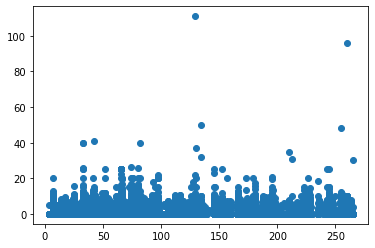

In [32]:
x = data_no_outliers_cc_only['PULocationID']
y = data_no_outliers_cc_only['tip_amount']
plt.scatter(x, y)
#no obvious correlation

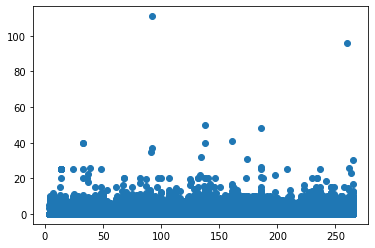

In [33]:
x = data_no_outliers_cc_only['DOLocationID']
y = data_no_outliers_cc_only['tip_amount']
plt.scatter(x, y)
#no obvious correlation

0.280965035218676


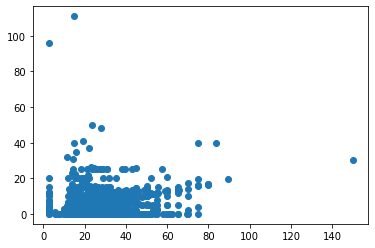

In [44]:
x = data_no_outliers_cc_only['fare_amount']
y = data_no_outliers_cc_only['tip_amount']
plt.scatter(x, y)
print(x.corr(y))
#no obvious correlation

0.28082204817677753


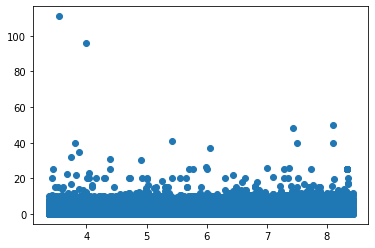

In [45]:
x = data_no_outliers_cc_only['trip_distance']
y = data_no_outliers_cc_only['tip_amount']
plt.scatter(x, y)
print(x.corr(y))
#no obvious correlation

0.6320001209028482


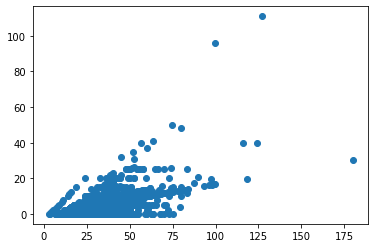

In [46]:
x = data_no_outliers_cc_only['total_amount']
y = data_no_outliers_cc_only['tip_amount']
print(x.corr(y))
plt.scatter(x, y)
#some slight correlation. This is the most correlation I was able to find, but it's not particularly insightful
#the total_amount includes the tip_amount for credit cards, so there naturally would be a relationship here.

0.280965035218676


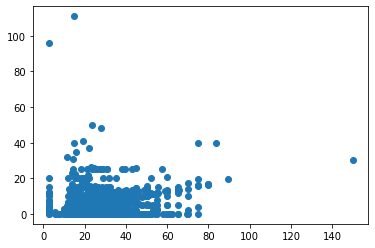

In [47]:
x = data_no_outliers_cc_only['fare_amount']
y = data_no_outliers_cc_only['tip_amount']
print(x.corr(y))
plt.scatter(x, y)
#some slight correlation. 